# Fren-Z

Interest-based friendship formation for Gen-Zs

## About Us
Interest-based friendship formation for Gen-Zs
We are a group of NUS students participating in Makerthon 2022, and we are creating Project Fren-Z for the Gen Zs to make friends within NUS using an interest-based algorithm.


## Description
This notebook contains code to allow users to group individuals based on their interests (top 3) 

To use this notebook

* Go to KMeans (Development), to understand the code
 
* Go to KMeans (User), to use the code




# KMeans (Development)

## Import Libaries 

## Mounting the drive

## Get dataset

### Create dataset

In [ ]:
import csv
import random

def createSample(n = 30):
  out = {}
  for i in range(n):
    lst = []
    while len(lst) < 3:
      x = random.randint(1,12)
      if x not in lst:
        lst.append(x)
    out["id%d"%i] = lst
  return out

createSample()

{'id0': [1, 4, 7],
 'id1': [12, 7, 4],
 'id10': [7, 6, 11],
 'id11': [8, 4, 12],
 'id12': [11, 12, 3],
 'id13': [8, 9, 7],
 'id14': [12, 10, 2],
 'id15': [8, 12, 9],
 'id16': [2, 7, 4],
 'id17': [11, 6, 4],
 'id18': [4, 6, 9],
 'id19': [2, 8, 5],
 'id2': [2, 12, 6],
 'id20': [10, 6, 1],
 'id21': [7, 11, 8],
 'id22': [2, 1, 3],
 'id23': [3, 8, 11],
 'id24': [12, 8, 3],
 'id25': [11, 9, 1],
 'id26': [8, 5, 11],
 'id27': [8, 12, 1],
 'id28': [10, 5, 8],
 'id29': [6, 5, 3],
 'id3': [6, 12, 8],
 'id4': [1, 10, 12],
 'id5': [1, 12, 4],
 'id6': [7, 8, 10],
 'id7': [4, 6, 11],
 'id8': [3, 4, 12],
 'id9': [8, 4, 11]}

### Load dataset

The dataset loaded from the csv file must be in the following format:

| Email             | Interests |
| ----------------- | ----------- |
| test01@u.nus.edu  | [\"Dancing", "Food", "Games"]       |
| test02@u.nus.edu  | [\"Community & Engagement","Dancing", "Food"]        |






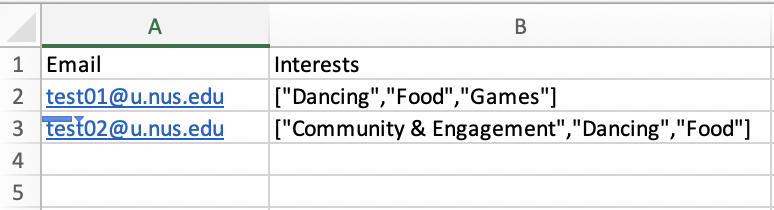

In [ ]:
# Load Label
label = {
    "Arts & Culture": 1,
    "Community & Engagement": 2,
    "Dancing": 3,
    "Food": 4,
    "Games": 5,
    "Music": 6,
    "Nature & Animals": 7,
    "Health & Wellbeing": 8,
    "Science & Technology": 9,
    "Sports & Fitness": 10,
    "Travel & Outdoor Activities": 11,
    "Writing & Reading": 12
}

In [ ]:
# CSV to Dictionary
import csv

def CSVtoDict2(path = './in.csv', label = {}):
	file = open(path)
	csvreader = csv.reader(file,delimiter = ';')

	d = {}

	rows = []
	
	index = 0
	for row in csvreader:
		if index == 0:
			index = 1
			continue
		index += 1
		x, y = row[0].split(',', 1)
		lst = []
		for i in label.keys():
			if y.find(i) != -1:
				lst.append(label[i])
		d[x+str(index)] = lst

	return d

## Functions

In [ ]:
def encoding(d1):
  '''
    It encodes interest into 1, 0
    From [1, 3, 7] to [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0] with a size of 12 for 12 interests
  '''
  d = {} 
  for i in d1.keys():
    x = d1[i][0]
    y = d1[i][1]
    z = d1[i][2]
    for h in range(1,12+1):
      if x != 1 and h == 1:
        d[i] = [0]
      elif x == 1 and h == 1:
        d[i] = [1]
      elif h == x or h == y or h == z:
        d[i].append(1)
      elif h != x or h != y or h != z:
        d[i].append(0)
  return d

In [ ]:
from k_means_constrained import KMeansConstrained
import numpy as np

def getGrouping(d, show=False, s_min=4, s_max=6, label={}):
  '''
    It clusters the data into group of 4 - 6
    Features used for clustering depends on the top 3 interest 
  '''
  data = list(d.values())

  X = np.array(data)

  # Parameter
  clf = KMeansConstrained(
      n_clusters=len(X)//s_min,       # Set group size 
      size_min=s_min,                 # Min group size
      size_max=s_max,                 # Max group size
      random_state=1
  )

  # Group
  result = clf.fit_predict(X)
  # print(result)

  group = {} # Empty List
  keys_list = list(d)

  # Iterate through results 
  for i in range(len(result)):
    if result[i] not in group:
      group[result[i]] = [keys_list[i]]
    else:
      group[result[i]].append(keys_list[i])

  # Display grouping
  if show == True:
    for key in sorted(group):
        print("{}: {}".format(key, group[key]))
        for i in group[key]:
          print("{}\t-> {}".format(i, d[i]))
        print('-'*10)

        # Get overlapping top interst
        lst = []
        for i in group[key]:
          lst.append(d[i])
        
        r = []
        for i in range(4):
          r.append(0)

        for j in lst:
          # print(j)
          for i in range(4):
            r[i] += j[i]

        print(r)

        top = []
        max_v = max(r)
        for i in range(len(r)):
          if r[i] == max_v:
            for z in label.keys():
              if label[z] == i:
                top.append(z)
        print(top)

  return group, top

In [ ]:
lst = [
       [1, 0 , 1, 1],
       [1, 0 , 1, 0],
       [0, 1 , 0, 0]
]

r = []
for i in range(4):
  r.append(0)

for j in lst:
  # print(j)
  for i in range(4):
    r[i] += j[i]

print(r)

max_v = max(r)
for i in range(len(r)):
  if r[i] == max_v:
    print(i)

[2, 1, 2, 1]
0
2


In [ ]:
import csv

def toCSV(path='./out.csv', x={}):
  '''
    To write to CSV

    Format:
      GROUP, ID1, ID2, ID3, ID4, ID5, ID6
  '''
  with open(path, 'w') as f:
    f.write("%s,%s,%s,%s,%s,%s,%s\n"%("group", "id1", "id2", "id3", "id4", "id5", "id6"))
    for key in sorted(x.keys()):
      while len(x[key]) < 6:
        x[key].append('0')
      # print(x[key])
      f.write("%s,%s,%s,%s,%s,%s,%s\n"%(key,x[key][0],x[key][1],x[key][2],x[key][3],x[key][4],x[key][5]))

## Driver Code

In [ ]:
# Driver

# d1 = CSVtoDict2("new_group.csv", label) # Read CSV & reduce the label to numbers
d1 = createSample() # Test

d2 = encoding(d1) # Change Numbers to 1, 0 where 1 = Interested, 0 = Not Interested

d3, interests = getGrouping(d=d2, show=True, s_min=4, label=label)

toCSV(x=d3)

0: ['id1', 'id6', 'id7', 'id13', 'id17']
id1	-> [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0]
id6	-> [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0]
id7	-> [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
id13	-> [0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0]
id17	-> [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0]
----------
[0, 0, 1, 1]
['Community & Engagement', 'Dancing']
1: ['id4', 'id8', 'id9', 'id21', 'id28']
id4	-> [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1]
id8	-> [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]
id9	-> [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1]
id21	-> [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1]
id28	-> [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1]
----------
[0, 0, 1, 0]
['Community & Engagement']
2: ['id11', 'id16', 'id18', 'id26']
id11	-> [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
id16	-> [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]
id18	-> [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]
id26	-> [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
----------
[0, 4, 0, 0]
['Arts & Culture']
3: ['id3', 'id20', 'id24', 'id25']
id3	-> [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
id20	-> [0, 1, 0, 1, 0,



k-means-contrainted package taken from https://github.com/joshlk/k-means-constrained

Run code below to import package

In [ ]:
!pip install k-means-constrained

     |████████████████████████████████| 557 kB 4.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 14.6 MB 872 kB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Using cached numpy-1.21.5-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
     |████████████████████████████████| 1.1 MB 47.5 MB/s 
     |████████████████████████████████| 126 kB 53.4 MB/s 
  Created wheel for k-means-constrained: filename=k_means_constrained-0.6.0-cp37-cp37m-linux_x86_64.whl size=1410488 sha256=1999bfc8c02dc960feb73bebc4955353c32fba55ce36fd53e12e1913fee945c9
  Stored in directory: /root/.cache/pip/wheels/c1/71/49/3c504743f39dc4f94af42a1f4fa1ea8a9709c35101402bcd4f
Successfully built k-means-constrained
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobu

Run code below to mount drive to allow to use file from drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# KMeans (User)

## 1. Setup

In [ ]:
# Install Package
!pip install k-means-constrained

# Mount Drive
from google.colab import drive
drive.mount('/content/gdrive')

     |████████████████████████████████| 557 kB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 14.6 MB 57.7 MB/s 
  Using cached numpy-1.21.5-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 1.1 MB 47.1 MB/s 
     |████████████████████████████████| 126 kB 54.3 MB/s 
  Created wheel for k-means-constrained: filename=k_means_constrained-0.6.0-cp37-cp37m-linux_x86_64.whl size=1410485 sha256=4984d52e0d9b192f185a48bc2c2c8e138307cd6f8d105d2100e5023ea7d67eba
  Stored in directory: /root/.cache/pip/wheels/c1/71/49/3c504743f39dc4f94af42a1f4fa1ea8a9709c35101402bcd4f
Successfully built k-means-constrained
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protob

Mounted at /content/gdrive


## 2. Insert new data file

**Add** file as `data.csv`

The dataset loaded from the csv file must be in the following format:

| Email             | Interests |
| ----------------- | ----------- |
| test01@u.nus.edu  | [\"Dancing", "Food", "Games"]       |
| test02@u.nus.edu  | [\"Community & Engagement","Dancing", "Food"]        |


## 3. Run the cell below

In [ ]:
# Load Label
label = {
    "Arts & Culture": 1,
    "Community & Engagement": 2,
    "Dancing": 3,
    "Food": 4,
    "Games": 5,
    "Music": 6,
    "Nature & Animals": 7,
    "Health & Wellbeing": 8,
    "Science & Technology": 9,
    "Sports & Fitness": 10,
    "Travel & Outdoor Activities": 11,
    "Writing & Reading": 12
}

# CSV to Dictionary
import csv

def CSVtoDict2(path = './in.csv', label = {}):
	file = open(path)
	csvreader = csv.reader(file,delimiter = ';')

	d = {}

	rows = []
	
	index = 0
	for row in csvreader:
		if index == 0:
			index = 1
			continue
		index += 1
		x, y = row[0].split(',', 1)
		lst = []
		for i in label.keys():
			if y.find(i) != -1:
				lst.append(label[i])
		d[x] = lst

	return d

def encoding(d1):
  '''
    It encodes interest into 1, 0
    From [1, 3, 7] to [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0] with a size of 12 for 12 interests
  '''
  d = {} 
  for i in d1.keys():
    x = d1[i][0]
    y = d1[i][1]
    z = d1[i][2]
    for h in range(1,12+1):
      if x != 1 and h == 1:
        d[i] = [0]
      elif x == 1 and h == 1:
        d[i] = [1]
      elif h == x or h == y or h == z:
        d[i].append(1)
      elif h != x or h != y or h != z:
        d[i].append(0)
  return d

from k_means_constrained import KMeansConstrained
import numpy as np

def getGrouping(d, show=False, s_min=3, s_max=5):
  '''
    It clusters the data into group of 3 - 5
    Features used for clustering depends on the top 3 interest 
  '''
  data = list(d.values())

  X = np.array(data)

  # Parameter
  clf = KMeansConstrained(
      n_clusters=len(X)//s_min,       # Set group size 
      size_min=s_min,                 # Min group size
      size_max=s_max,                 # Max group size
      random_state=1
  )

  # Group
  result = clf.fit_predict(X)
  # print(result)

  group = {} # Empty List
  keys_list = list(d)

  # Iterate through results 
  for i in range(len(result)):
    if result[i] not in group:
      group[result[i]] = [keys_list[i]]
    else:
      group[result[i]].append(keys_list[i])

  # Display grouping
  if show == True:
    for key in sorted(group):
        print("{}: {}".format(key, group[key]))
        for i in group[key]:
          print("{}\t-> {}".format(i, d[i]))
        print('-'*10)
  
  return group

import csv

def toCSV(path='./results.csv', x={}):
  '''
    To write to CSV

    Format:
      GROUP, ID1, ID2, ID3, ID4, ID5, ID6
  '''
  with open(path, 'w') as f:
    f.write("%s,%s,%s,%s,%s,%s,%s\n"%("group", "id1", "id2", "id3", "id4", "id5", "id6"))
    for key in sorted(x.keys()):
      while len(x[key]) < 6:
        x[key].append('0')
      # print(x[key])
      f.write("%s,%s,%s,%s,%s,%s,%s\n"%(key,x[key][0],x[key][1],x[key][2],x[key][3],x[key][4],x[key][5]))

# DRIVER

d1 = CSVtoDict2("data.csv", label) # Read CSV & reduce the label to numbers

d2 = encoding(d1) # Change Numbers to 1, 0 where 1 = Interested, 0 = Not Interested

d3 = getGrouping(d=d2, show=True, s_min=3)

toCSV(x=d3)

0: ['0test01@u.nus.edu', '2test01@u.nus.edu', '3test01@u.nus.edu', '19test01@u.nus.edu']
0test01@u.nus.edu	-> [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
2test01@u.nus.edu	-> [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
3test01@u.nus.edu	-> [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
19test01@u.nus.edu	-> [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
----------
1: ['9test01@u.nus.edu', '10test01@u.nus.edu', '11test01@u.nus.edu']
9test01@u.nus.edu	-> [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]
10test01@u.nus.edu	-> [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]
11test01@u.nus.edu	-> [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]
----------
2: ['15test01@u.nus.edu', '16test01@u.nus.edu', '17test01@u.nus.edu', '18test01@u.nus.edu']
15test01@u.nus.edu	-> [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
16test01@u.nus.edu	-> [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
17test01@u.nus.edu	-> [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
18test01@u.nus.edu	-> [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
----------
3: ['8test01@u.nus.edu', '12test01@u.nus.edu', '13test01@u.nus.edu']
8te

## 4. View results

**View** file is `results.csv`

## 5. Understanding results

In [ ]:
import numpy as np
import seaborn as sns

def getHeatMap(d3, labels):
  """
    Get Top Interests
  """
  sns.set_theme()
  sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

  
  d3 = dict(sorted(d3.items()))
  for index in range(len(d3)):
    comp = []
    for i in d3[index]:
      if i != '0':
        comp.append(d2[i])

    r = []
    for i in range(12):
      r.append(0)
      for j in range(len(comp)):
        r[i] += comp[j][i]
      r[i] = round(r[i]/len(comp), 2)
    
    # print(r)
    # Get top interests 
    interests = []
    max_v = max(r)
    indexes = []
    for j in range(len(r)):
      if r[j] == max_v:
        indexes.append(j)
    
    for k1 in labels.keys():
      for k2 in indexes:
        if labels[k1] == k2:
          interests.append(k1)
    
    print("Group {} top interest is {}".format(list(d3.keys())[index], ', '.join(interests[:3])))
    uniform_data = np.array(comp)
  
    # if index == 0:
      # ax = sns.heatmap(uniform_data, cmap="Blues")

getHeatMap(d3, label)

Group 0 top interest is Community & Engagement, Dancing, Food
Group 1 top interest is Music, Nature & Animals, Health & Wellbeing
Group 2 top interest is Arts & Culture, Community & Engagement
Group 3 top interest is Science & Technology, Sports & Fitness, Travel & Outdoor Activities
Group 4 top interest is Arts & Culture, Community & Engagement, Dancing
Group 5 top interest is Community & Engagement
